In [ ]:
# SUPPLY CHAIN ANALYSIS

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# Load dataset
df = pd.read_csv("E:/archive (2)/supply_chain_data.csv")

In [20]:
print(df)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [22]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [23]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


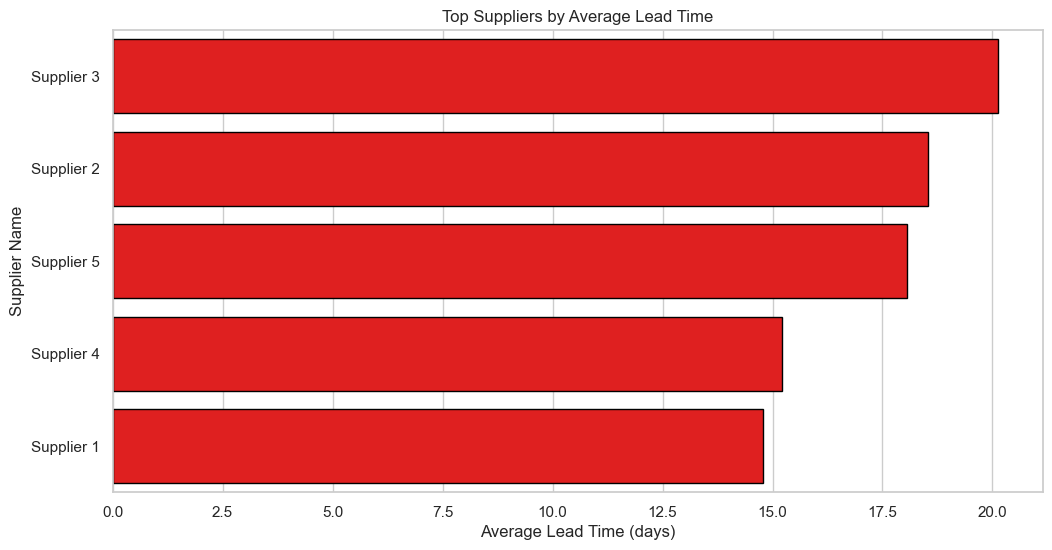

In [24]:
# ----- EDA Visualizations -----
# 1. Top Suppliers by Average Lead Time
top_lead_time_suppliers = df.groupby("Supplier name")["Lead time"].mean().sort_values(ascending=False)
plt.figure()
sns.barplot(x=top_lead_time_suppliers.values, y=top_lead_time_suppliers.index, color="Red", edgecolor='black')
plt.title("Top Suppliers by Average Lead Time")
plt.xlabel("Average Lead Time (days)")
plt.ylabel("Supplier Name")
plt.show()

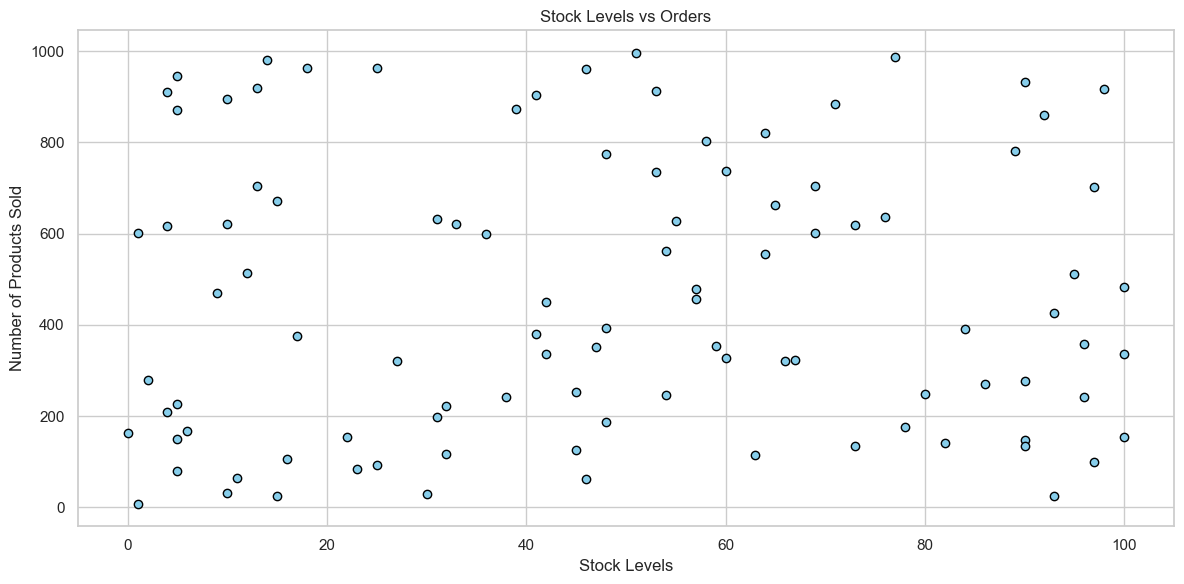

In [25]:
#2. Stocks level vs orders
plt.scatter(df['Stock levels'], df['Number of products sold'], color='skyblue', edgecolor='black')
plt.title("Stock Levels vs Orders")
plt.xlabel("Stock Levels")
plt.ylabel("Number of Products Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


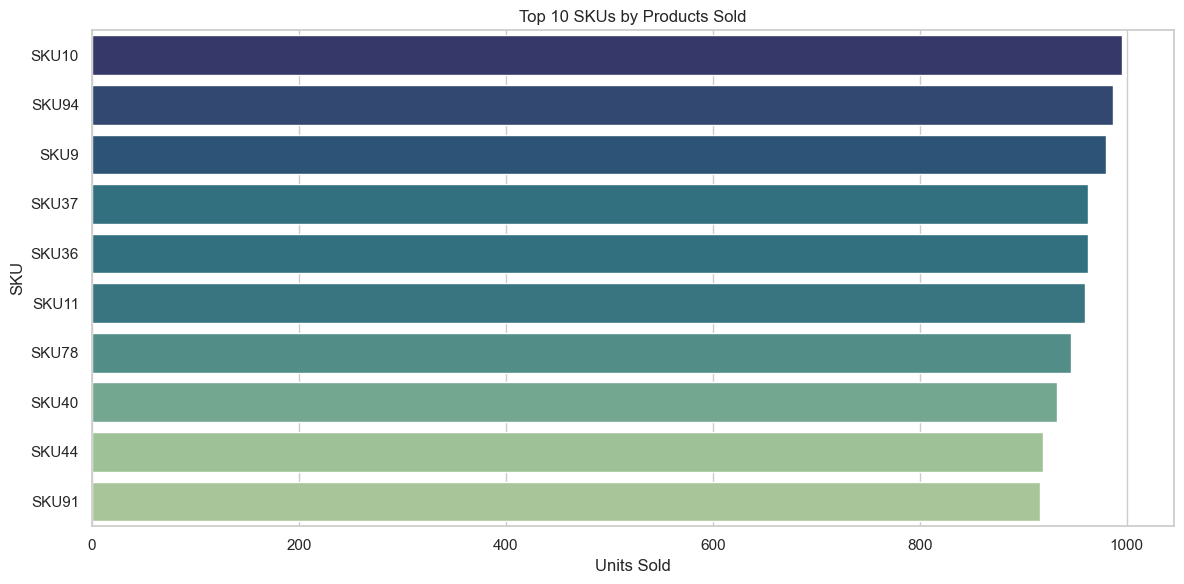

In [26]:
# 3.Top 10 SKU
top_skus = df.groupby('SKU')['Number of products sold'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_skus.values, y=top_skus.index, palette='crest',hue=top_skus,legend=False)
plt.title("Top 10 SKUs by Products Sold")
plt.xlabel("Units Sold")
plt.ylabel("SKU")
plt.tight_layout()
plt.show()


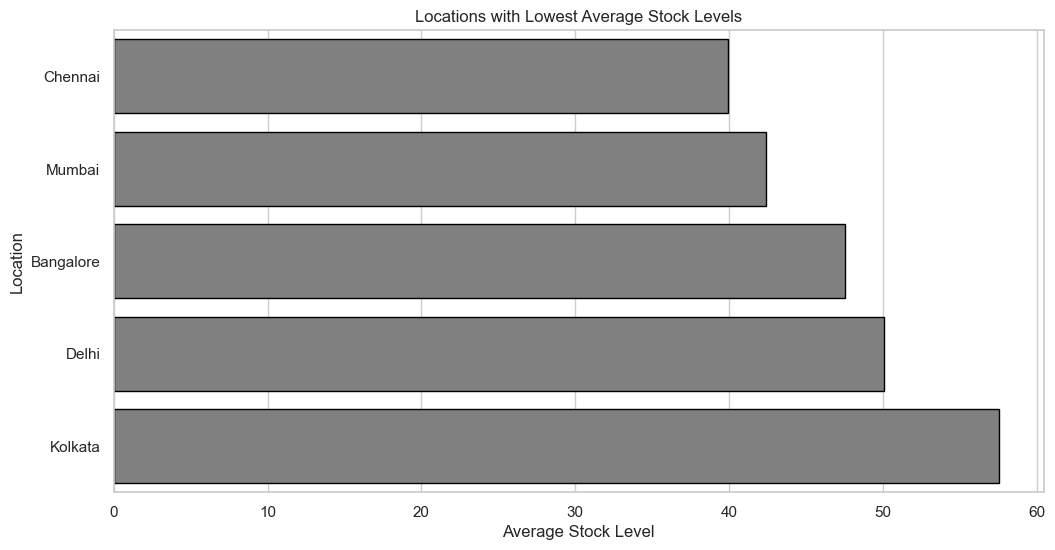

In [27]:
# 4. Warehouses with Low Average Stock Levels
low_stock_locations = df.groupby("Location")["Stock levels"].mean().sort_values()
plt.figure()
sns.barplot(x=low_stock_locations.values, y=low_stock_locations.index, color="grey",edgecolor="black")
plt.title("Locations with Lowest Average Stock Levels")
plt.xlabel("Average Stock Level")
plt.ylabel("Location")
plt.show()

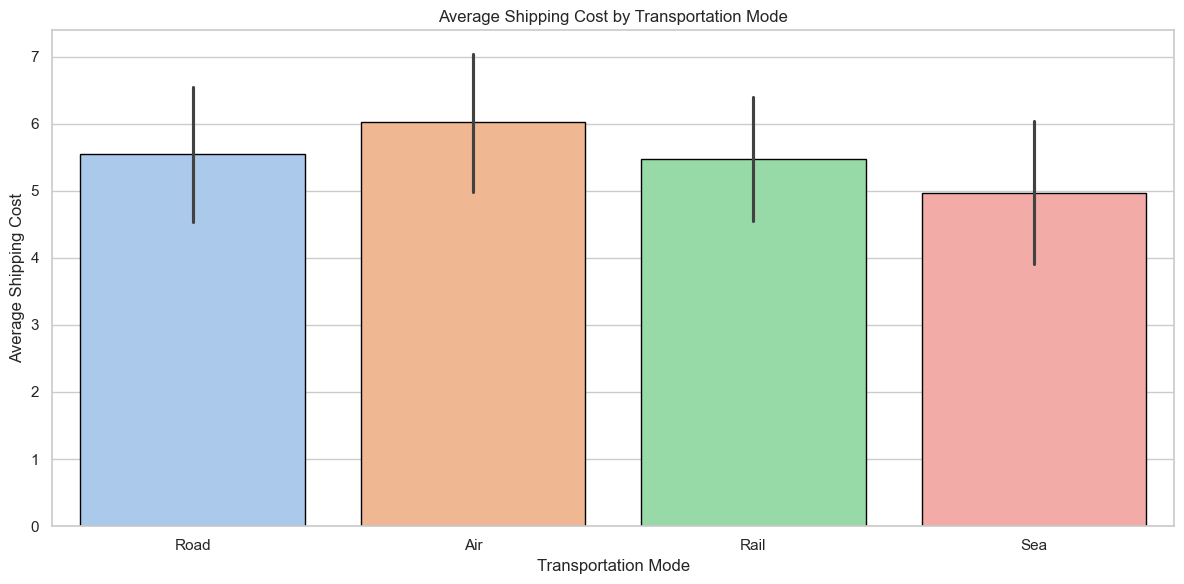

In [28]:
#5. Average shiping cost by transport modes
sns.barplot(data=df, x='Transportation modes', y='Shipping costs', estimator='mean', palette='pastel',hue= "Transportation modes",edgecolor="black")
plt.title("Average Shipping Cost by Transportation Mode")
plt.xlabel("Transportation Mode")
plt.ylabel("Average Shipping Cost")
plt.tight_layout()
plt.show()


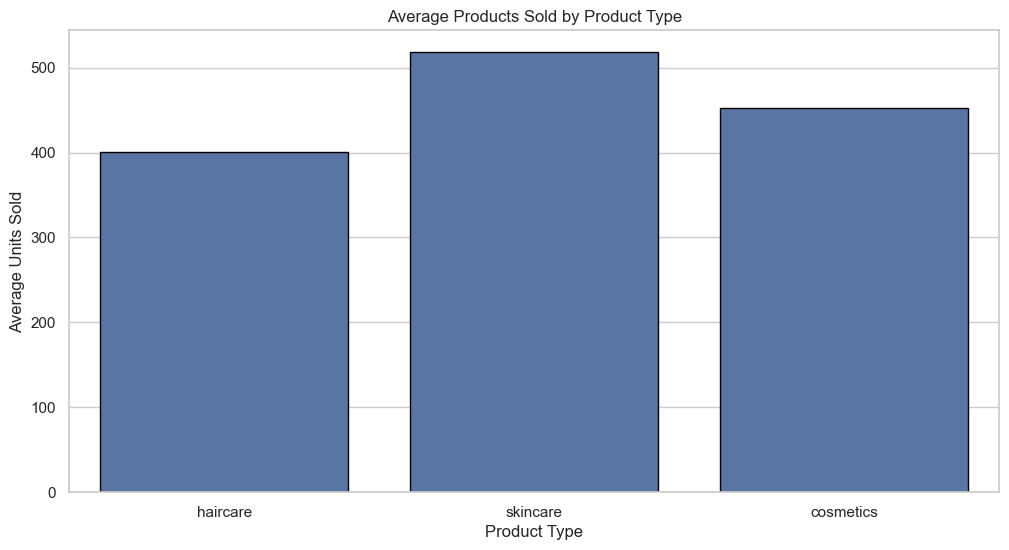

In [29]:
# 6. Product Type vs Number Sold
plt.figure()
sns.barplot(data=df, x="Product type", y="Number of products sold", estimator=np.mean, errorbar=None, edgecolor="black")
plt.title("Average Products Sold by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Units Sold")
plt.show()

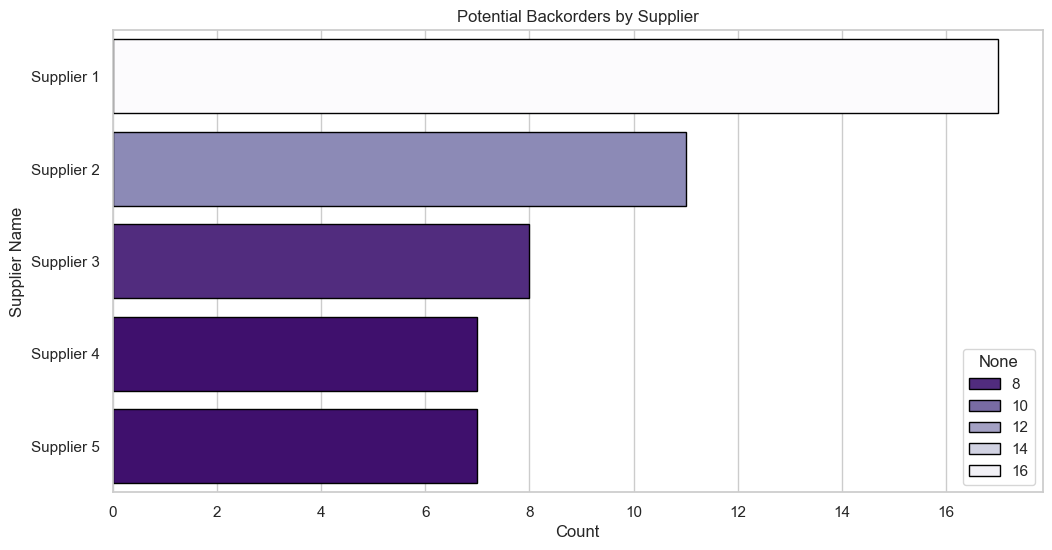

In [30]:
#7. Backorders by suppliers
df["Potential Backorder"] = df["Availability"] < df["Order quantities"]
backorders_by_supplier = df[df["Potential Backorder"]].groupby("Supplier name").size().sort_values(ascending=False)
plt.figure()
sns.barplot(x=backorders_by_supplier.values, y=backorders_by_supplier.index, palette="Purples_r",hue=backorders_by_supplier,edgecolor="black",legend="brief")
plt.title("Potential Backorders by Supplier")
plt.xlabel("Count")
plt.ylabel("Supplier Name")
plt.show()

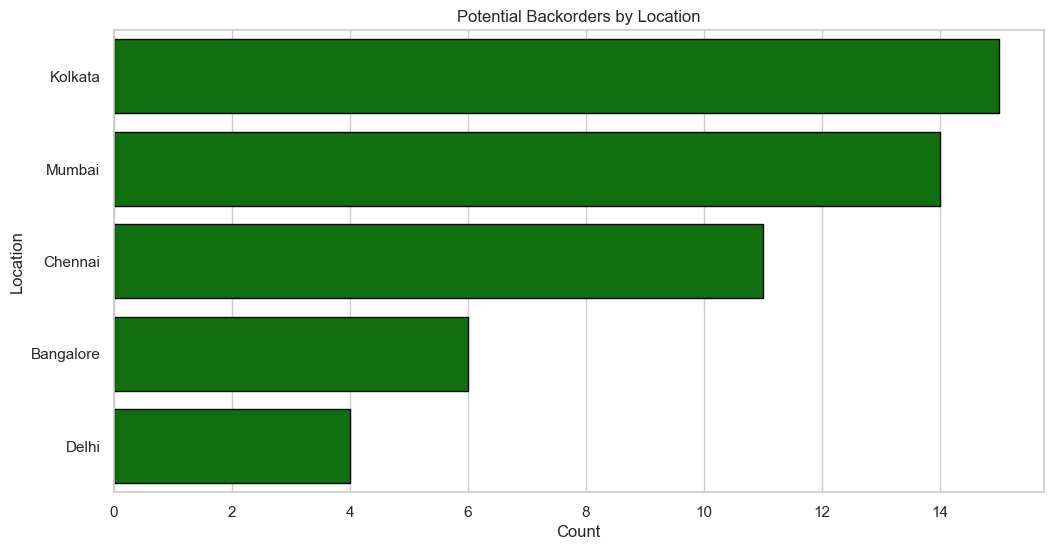

In [31]:
#8. Backorders by Location
backorders_by_location = df[df["Potential Backorder"]].groupby("Location").size().sort_values(ascending=False)
plt.figure()
sns.barplot(x=backorders_by_location.values, y=backorders_by_location.index, color="Green",edgecolor="black")
plt.title("Potential Backorders by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

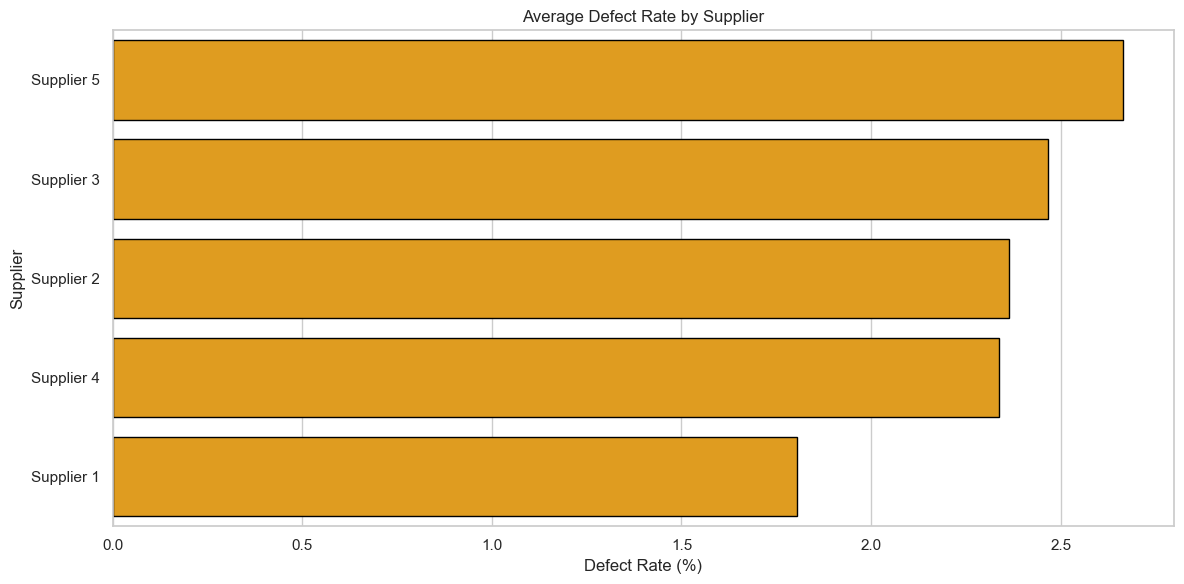

In [32]:
#9. Average defect rate by suppliers
supplier_defect = df.groupby('Supplier name')['Defect rates'].mean().sort_values(ascending=False)
sns.barplot(x=supplier_defect.values, y=supplier_defect.index, color='orange',edgecolor="black")
plt.title("Average Defect Rate by Supplier")
plt.xlabel("Defect Rate (%)")
plt.ylabel("Supplier")
plt.tight_layout()
plt.show()


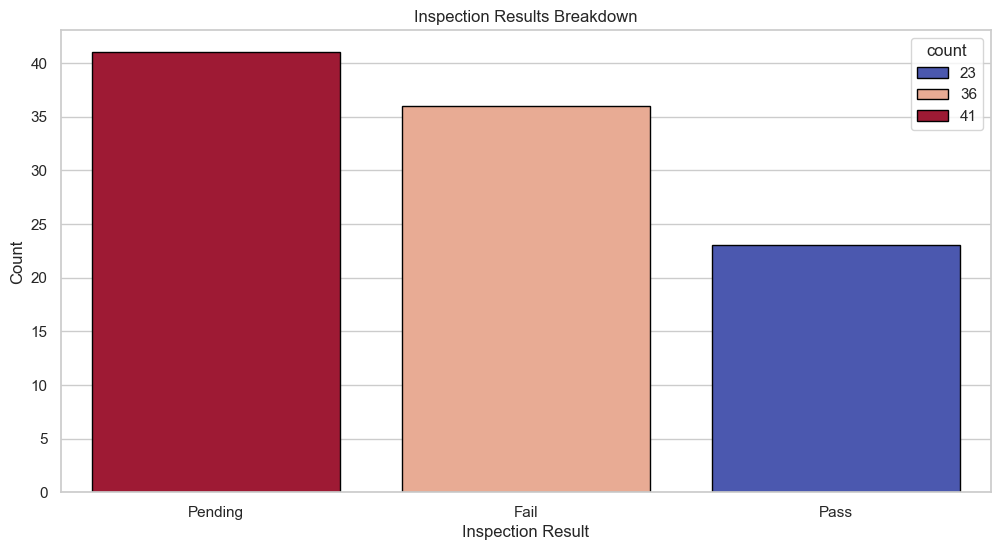

In [33]:
# 10. Inspection Result Breakdown
inspection_counts = df["Inspection results"].value_counts()
plt.figure()
sns.barplot(x=inspection_counts.index, y=inspection_counts.values, palette="coolwarm",edgecolor="black",hue=inspection_counts)
plt.title("Inspection Results Breakdown")
plt.xlabel("Inspection Result")
plt.ylabel("Count")
plt.show()


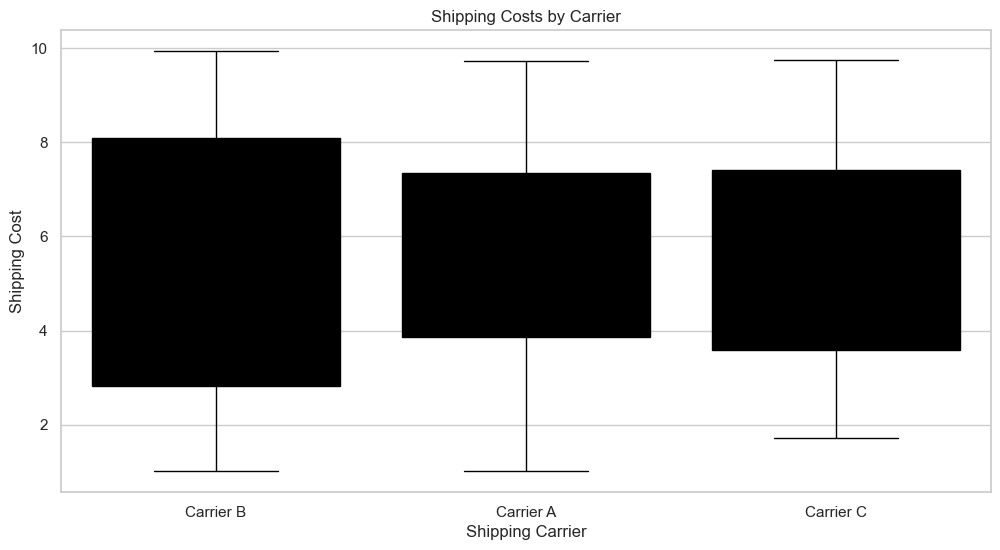

In [34]:
# 11. Shipping Cost by Carrier
plt.figure()
sns.boxplot(x="Shipping carriers", y="Shipping costs", data=df, color="black")
plt.title("Shipping Costs by Carrier")
plt.xlabel("Shipping Carrier")
plt.ylabel("Shipping Cost")
plt.show()

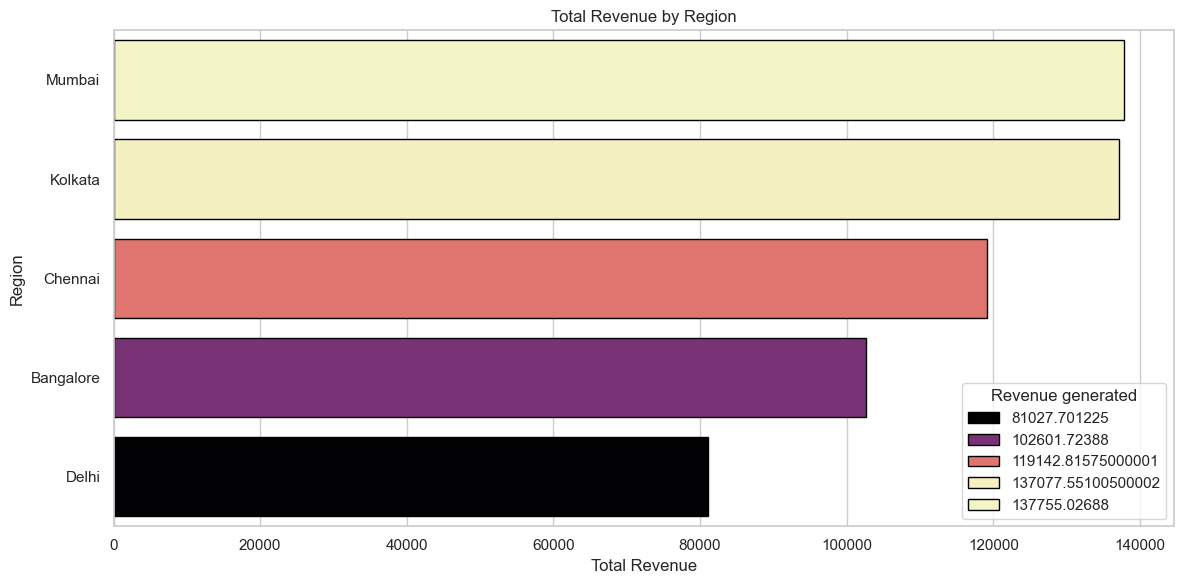

In [35]:
# 12. Revenue by region
revenue_by_region = df.groupby('Location')['Revenue generated'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette='magma',edgecolor="black",hue=revenue_by_region,legend="full")
plt.title("Total Revenue by Region")
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


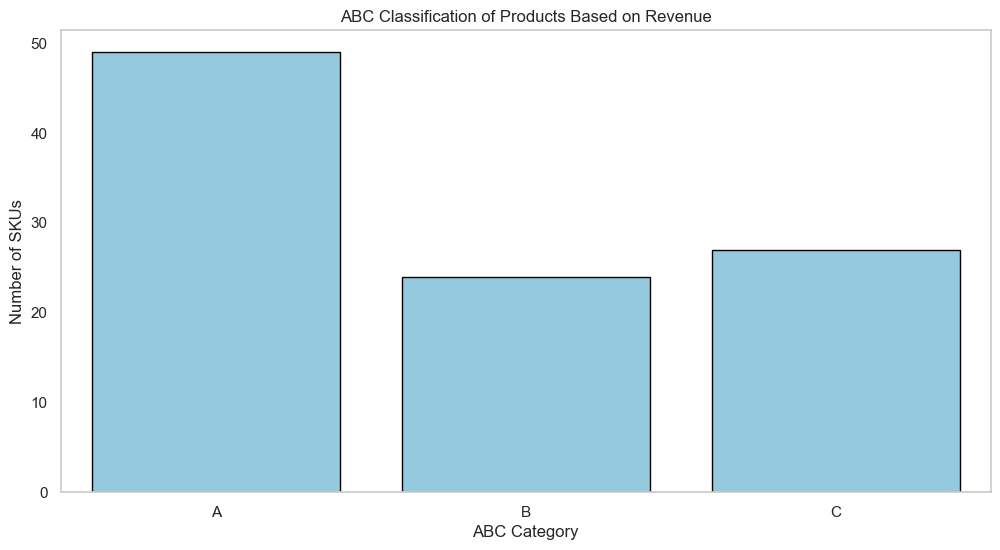

In [36]:
# ----- ABC Analysis -----
abc_df = df[["SKU", "Revenue generated"]].copy()
abc_df = abc_df.groupby("SKU").sum().sort_values(by="Revenue generated", ascending=False)
abc_df["Cumulative Revenue"] = abc_df["Revenue generated"].cumsum()
abc_df["Cumulative Percentage"] = 100 * abc_df["Cumulative Revenue"] / abc_df["Revenue generated"].sum()

def assign_abc_class(percentage):
    if percentage <= 70:
        return 'A'
    elif percentage <= 90:
        return 'B'
    else:
        return 'C'

abc_df["ABC Category"] = abc_df["Cumulative Percentage"].apply(assign_abc_class)
abc_counts = abc_df["ABC Category"].value_counts().sort_index()
plt.figure()
sns.barplot(x=abc_counts.index, y=abc_counts.values,color="skyblue",edgecolor="black")
plt.title("ABC Classification of Products Based on Revenue")
plt.xlabel("ABC Category")
plt.ylabel("Number of SKUs")
plt.grid(axis="y")
plt.show()

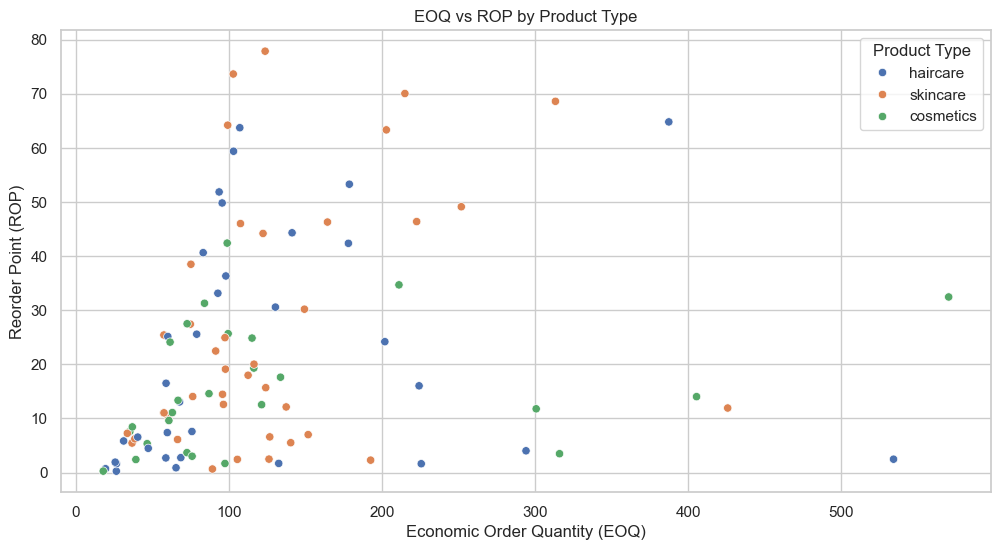

In [37]:
# ----- EOQ & ROP Calculation -----
ordering_cost = 50
holding_cost_pct = 0.10

df["Annual Demand"] = df["Number of products sold"]
df["Holding Cost"] = df["Price"] * holding_cost_pct
df["EOQ"] = np.sqrt((2 * ordering_cost * df["Annual Demand"]) / df["Holding Cost"])
df["ROP"] = (df["Annual Demand"] / 365) * df["Lead time"]

# Show EOQ & ROP with visuals
plt.figure()
sns.scatterplot(data=df, x="EOQ", y="ROP", hue="Product type",color ="Set2")
plt.title("EOQ vs ROP by Product Type")
plt.xlabel("Economic Order Quantity (EOQ)")
plt.ylabel("Reorder Point (ROP)")
plt.legend(title="Product Type")
plt.grid(True)
plt.show()



In [38]:
# Preview EOQ and ROP results
df_summary = df[["SKU", "Product type", "Annual Demand", "EOQ", "ROP"]].head()
print(df_summary)


    SKU Product type  Annual Demand         EOQ        ROP
0  SKU0     haircare            802  107.185137  63.720548
1  SKU1     skincare            736  222.674460  46.378082
2  SKU2     haircare              8   26.584461   0.263014
3  SKU3     skincare             83   36.837779   5.457534
4  SKU4     skincare            871  425.735598  11.931507
